In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
get_security_info('000001.XSHE').display_name 

'平安银行'

In [4]:
df = get_price('000001.XSHE', '2016-02-01', '2018-10-01',)
df.index.name = 'date'
df.head()

,open,close,high,low,volume,money
date,,,,,,
2016-02-01,7.36,7.23,7.39,7.19,56612207.0,4.126356e+08
2016-02-02,7.23,7.34,7.40,7.22,50022010.0,3.673605e+08
2016-02-03,7.27,7.27,7.30,7.21,37210775.0,2.699978e+08
2016-02-04,7.30,7.34,7.38,7.29,50563465.0,3.705862e+08
2016-02-05,7.35,7.32,7.36,7.31,36712210.0,2.691844e+08


In [5]:
period = 20
#平均值
df['sma'] = df['close'].rolling(period).mean()
#标准差
df['std'] = df['close'].rolling(period).std()

#布林轨道上界
df['upper'] = df['sma'] + (2 * df['std'])
df['lower'] = df['sma'] - (2 * df['std'])

#决定
close_list = pd.to_numeric(df['close'],downcast='float')
upper_list = pd.to_numeric(df['upper'],downcast='float')
lower_list = pd.to_numeric(df['lower'],downcast='float')


df['buy'] = np.where(close_list < lower_list, df['close'], np.NaN)
df['sell'] = np.where(close_list > upper_list, df['close'], np.NaN)

In [6]:
df_buy = pd.to_numeric(df['buy'])
df_sell = pd.to_numeric(df['sell'])
df_index = df.index
ls_order = []
for i in range(len(df_buy)):
    if np.isnan(df_buy[i]):
        pass
    else:
        ls_order.append([df_index[i],'buy',df_buy[i],i])
for i in range(len(df_sell)):
    if np.isnan(df_sell[i]):
        pass
    else:
        ls_order.append([df_index[i],'sell',df_sell[i],i])

In [7]:
ls_profit = []
for one in ls_order:
    i = one[3]
    k_num = 7
    try:
        if one[1] == 'buy':
            ls_profit.append(float(nklater(df,i,k_num))-one[2])
        else:
            ls_profit.append(one[2]-float(nklater(df,i,k_num)))
    except:
         pass   

In [8]:
ls_profit

[]

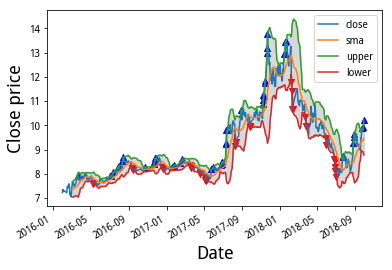

In [9]:
df = df.astype(float)
df[['close','sma','upper','lower']].plot()
plt.xlabel('Date',fontsize=18)

plt.ylabel('Close price',fontsize=18)
x_axis = df.index
plt.fill_between(x_axis, df['lower'], df['upper'], color='grey', alpha=0.30)

plt.scatter(df.index,df['buy'], color='red', label='Buy', marker='v', alpha=1)
plt.scatter(df.index,df['sell'], color='blue', label='Sell', marker='^', alpha=1)
   
plt.show() 